July 21 - Spatial Characteristics
====================
* Reading in netcdf global temperature files
* Heatmap of day/mean/median
* Overlaying a map
* Plotting cities

CWK: Plot New York, Philadelphia, Newark and Boston on a map and color the points based on the average temperature and precipitation of the city (2 plots).  Plot the mean global temperature and precipitation and the standard deviation. Submit these graphs and a paragraph comparing the city’s average temperature and precipitation (and the variability in it) to each other and to the regional pattern. Use the 2010-2015 data for this task and the following dates: 03/2010, 06/2010, 09/2010, 12/2010

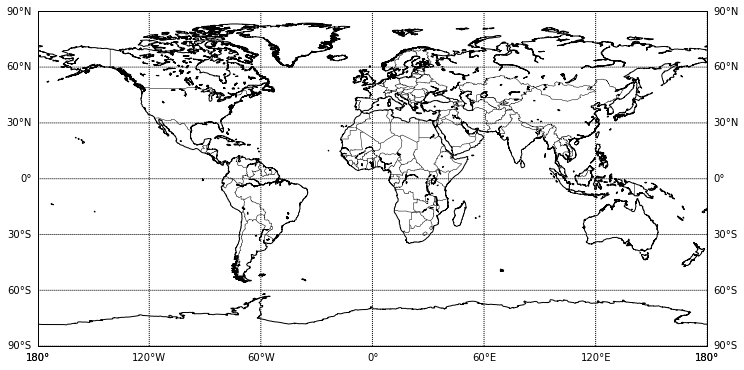

In [2]:
from IPython.core.display import Image 
Image(filename="map.png")

{-180: ([<matplotlib.lines.Line2D at 0x11516e10>],
  [<matplotlib.text.Text at 0xdd9c6a0>, <matplotlib.text.Text at 0xdd9cac8>]),
 -120: ([<matplotlib.lines.Line2D at 0xdd92898>],
  [<matplotlib.text.Text at 0xdd9ce80>]),
 -60: ([<matplotlib.lines.Line2D at 0xdd92da0>],
  [<matplotlib.text.Text at 0x10e02278>]),
 0: ([<matplotlib.lines.Line2D at 0xdd7c2e8>],
  [<matplotlib.text.Text at 0x10e02630>]),
 60: ([<matplotlib.lines.Line2D at 0xdd7c7f0>],
  [<matplotlib.text.Text at 0x10e029e8>]),
 120: ([<matplotlib.lines.Line2D at 0xdd7ccf8>],
  [<matplotlib.text.Text at 0x10e02da0>]),
 180: ([<matplotlib.lines.Line2D at 0xdd9c240>],
   <matplotlib.text.Text at 0x10e23550>])}

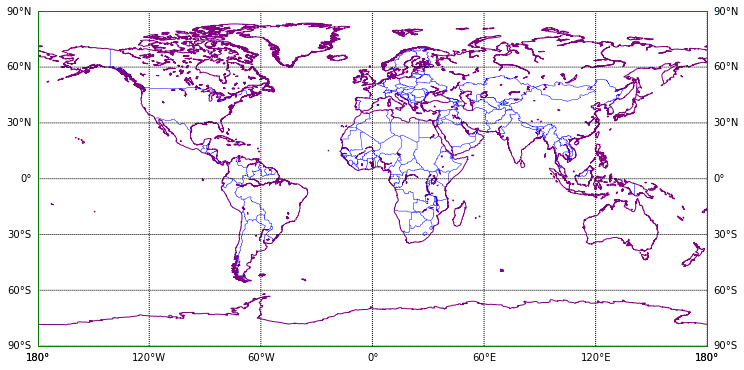

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

#make an empty map
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)

#projection: http://xkcd.com/977/
m = Basemap(projection='cyl', ax=ax, resolution = 'l',
            llcrnrlat=-90,urcrnrlat=90, 
            llcrnrlon=-180,urcrnrlon=180)

border_color = 'k'
#coastlines/boundaries
m.drawcoastlines(color='purple')
m.drawcountries(color='blue')
m.drawmapboundary(color='green')
#draws the meridian
m.drawparallels(np.arange(-90,91,30),labels=[1,1,0,0])
m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])


In [18]:
print np.arange(-90,91,30)
print np.arange(0,360,60)

[-90 -60 -30   0  30  60  90]
[  0  60 120 180 240 300]


In [21]:
#first lets list cities and their coordinates 
#(latitude, longitude)
cities = {'New York': (40.7142700,-74.0059700),
          'Boston': (42.321597,-71.089115 ),
         'Philadelphia':(39.9523400,-75.1637900),
         'Newark':(40.72422,-74.172574)}

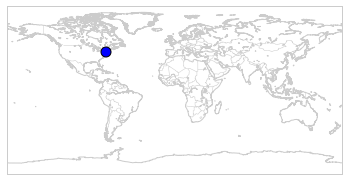

In [20]:
#Then Lets Plot New York

#unpack from the dictionary
lat = cities['New York'][0]
lon = cities['New York'][1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='cyl', ax=ax, resolution = 'l',
            llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180)

border_color = '0.8'
m.drawcoastlines(color=border_color)
m.drawcountries(color=border_color)
m.drawmapboundary(color=border_color)

#this translates lat lon to map
x, y = m(lon, lat)
m.scatter(x,y,s=100, c='blue', zorder=200)

Now add Boston, Philadelphia, and Newark to the plot and make them each a different color. 

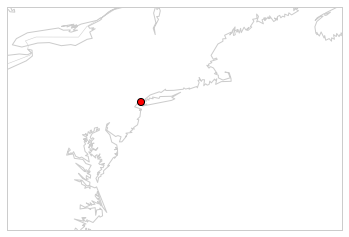

In [38]:
#lets zoom in

#we can exploit Python sequence unpacking syntax to shorten the unpacking
lat,lon = cities['New York']

#Now lets zoom
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#So figure out around what latitude and longitude are around our cities-
#maybe lats:38-43?, lons:70-76
m = Basemap(projection='cyl', ax=ax, resolution = 'l',
            llcrnrlat=35,urcrnrlat=45, 
            llcrnrlon=-80, urcrnrlon=-65)

border_color = '0.8'
m.drawcoastlines(color=border_color)
m.drawcountries(color=border_color)
m.drawmapboundary(color=border_color)
x, y = m(lon, lat)
m.scatter(x,y, s=50, c='red', zorder=100) 

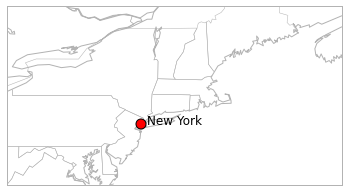

In [39]:
lat,lon = cities['New York']

#Now lets zoom
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#So figure out around what latitude and longitude are around our cities-
#maybe lats:38-43?, lons:70-76
m = Basemap(projection='cyl', ax=ax, resolution = 'l',
            llcrnrlat=38,urcrnrlat=46, 
            llcrnrlon=-80, urcrnrlon=-65)

border_color = '.7' #darken borders a bit
m.drawcoastlines(color=border_color)
m.drawcountries(color=border_color)
m.drawmapboundary(color=border_color)
#lets add states
m.drawstates(color=border_color)
x, y = m(lon, lat)
m.scatter(x,y, s=100, c='red', zorder=100) 
#and lets label
ax.text(x+.25, y, "New York", fontsize=12)

Now add in the other 3 cities and give a different color for each dot.

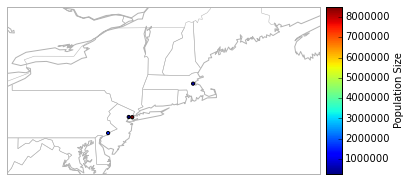

In [40]:
#Lets make the scatter colors mean something


#same code as before
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='cyl', ax=ax, resolution = 'l',
            llcrnrlat=38,urcrnrlat=46, 
            llcrnrlon=-80, urcrnrlon=-65)

border_color = '.7' #darken borders a bit
m.drawcoastlines(color=border_color)
m.drawcountries(color=border_color)
m.drawmapboundary(color=border_color)
m.drawstates(color=border_color)

xs = [] #list of cities X coordinates in map
ys = [] #list of cities Y coordinates in map
vals = []#list of vals to color by
pop_size = {'New York':8491079,
            'Boston':655884,
            'Philadelphia':1560297,
            'Newark':277140}
for name in cities:
    lat, lon = cities[name]
    x, y = m(lon, lat)
    xs.append(x)
    ys.append(y)
    vals.append(pop_size[name])
    
                  
#passing in a list of values for colors
#colors the scatter based on the data value
im = m.scatter(xs,ys, s=10,c=vals, zorder=100) 
cb = m.colorbar(im, ax=ax)
cb.set_label("Population Size")

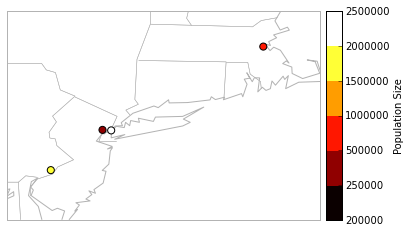

In [37]:
#Improve colormap/figure
#color libraries
import matplotlib.cm as mcm
import matplotlib.colors as mcolors


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#zoom in 
m = Basemap(projection='cyl', ax=ax, resolution = 'l',
            llcrnrlat=39,urcrnrlat=43, 
            llcrnrlon=-76, urcrnrlon=-70)

border_color = '.7' #darken borders a bit
m.drawcoastlines(color=border_color)
m.drawcountries(color=border_color)
m.drawmapboundary(color=border_color)
m.drawstates(color=border_color)

xs = [] #list of cities X coordinates in map
ys = [] #list of cities Y coordinates in map
vals = []#list of vals to color by
pop_size = {'New York':8491079,
            'Boston':655884,
            'Philadelphia':1560297,
            'Newark':277140}

for name in cities:
    lat, lon = cities[name]
    x, y = m(lon, lat)
    #ax.text(x+2, y, name)
    xs.append(x)
    ys.append(y)
    vals.append(pop_size[name])
    
            

#cmap is the set of colors used to color the data
#norm is the mapping from data value to color
#http://matplotlib.org/examples/color/colormaps_reference.html
cmap = mcm.hot
bounds = [200000,250000,500000,1000000,1500000,2000000,2500000]
norm = mcolors.BoundaryNorm(bounds, cmap.N)
#colors the scatter based on the numbers in values
im = m.scatter(xs,ys, s=50,c=vals, zorder=100, cmap=cmap, norm=norm)
cb = m.colorbar(im, ax=ax)
cb.set_label("Population Size")

Now try making a scatter graph where the color is based on:
* total precip in 2015
* total snowdepth in 2015
* temperature in december 2009
* temperature in december 2010-2015

In [23]:
import scipy.io.netcdf as ncd

dpath="C:\Users\story645\Desktop\TMP_200912_a.nc"

nc = ncd.netcdf_file(dpath)
print nc.variables.keys()

['latitude', 'TMP_2maboveground', 'longitude', 'time']


In [29]:
data = nc.variables['TMP_2maboveground'][...]
print data.shape
data = data.squeeze()
print data.shape


(1L, 190L, 384L)
(190L, 384L)


<matplotlib.colorbar.Colorbar instance at 0x0000000012D55908>

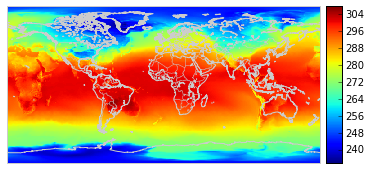

In [31]:
#unpack from the dictionary
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='cyl', ax=ax, resolution = 'l',
            llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180)

border_color = '0.8'
m.drawcoastlines(color=border_color)
m.drawcountries(color=border_color)
m.drawmapboundary(color=border_color)

im = m.imshow(data, interpolation='nearest')
m.colorbar(im, ax=ax)

<matplotlib.colorbar.Colorbar instance at 0x00000000190D91C8>

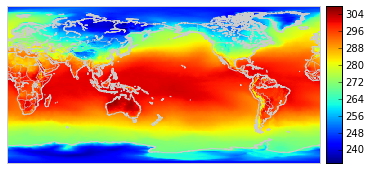

In [32]:
#oops, wrong longitude

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='cyl', ax=ax, resolution = 'l',
            llcrnrlat=-90,urcrnrlat=90, llcrnrlon=0,urcrnrlon=360)

border_color = '0.8'
m.drawcoastlines(color=border_color)
m.drawcountries(color=border_color)
m.drawmapboundary(color=border_color)

im = m.imshow(data, interpolation='nearest')
m.colorbar(im, ax=ax)

<matplotlib.colorbar.Colorbar instance at 0x0000000019B99B88>

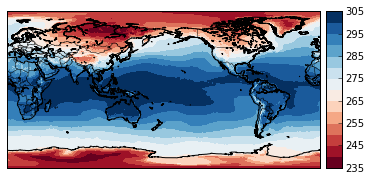

In [35]:
#Now lets make the colors less painful
import matplotlib.cm as mcm
import matplotlib.colors as mcolors

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='cyl', ax=ax, resolution = 'l',
            llcrnrlat=-90,urcrnrlat=90, llcrnrlon=0,urcrnrlon=360)

border_color = 'black'
m.drawcoastlines(color=border_color)
m.drawcountries(color=border_color)
m.drawmapboundary(color=border_color)

cmap = mcm.RdBu
norm = mcolors.BoundaryNorm(np.arange(235,310,5), cmap.N)
im = m.imshow(data, interpolation='nearest', cmap=cmap, norm=norm)
m.colorbar(im, ax=ax)

<matplotlib.colorbar.Colorbar instance at 0x000000001A542088>

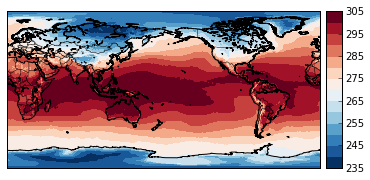

In [36]:
#Now lets make the colors less painful
import matplotlib.cm as mcm
import matplotlib.colors as mcolors

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='cyl', ax=ax, resolution = 'l',
            llcrnrlat=-90,urcrnrlat=90, llcrnrlon=0,urcrnrlon=360)

border_color = 'black'
m.drawcoastlines(color=border_color)
m.drawcountries(color=border_color)
m.drawmapboundary(color=border_color)

cmap = mcm.RdBu_r
norm = mcolors.BoundaryNorm(np.arange(235,310,5), cmap.N)
im = m.imshow(data, interpolation='nearest', cmap=cmap, norm=norm)
m.colorbar(im, ax=ax)